# preprocessing.StandardScaler (z-score)
- การแปลงค่าในคอลัมน์ให้เป็น z-score
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

##### Author: Chansinee Mueangnu
This code is the code that I learned from studying videos on the prasertcbs Youtube channel, which recorded lectures according to my own understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Boston House Prices
https://www.kaggle.com/vikrishnan/boston-house-prices

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [2]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


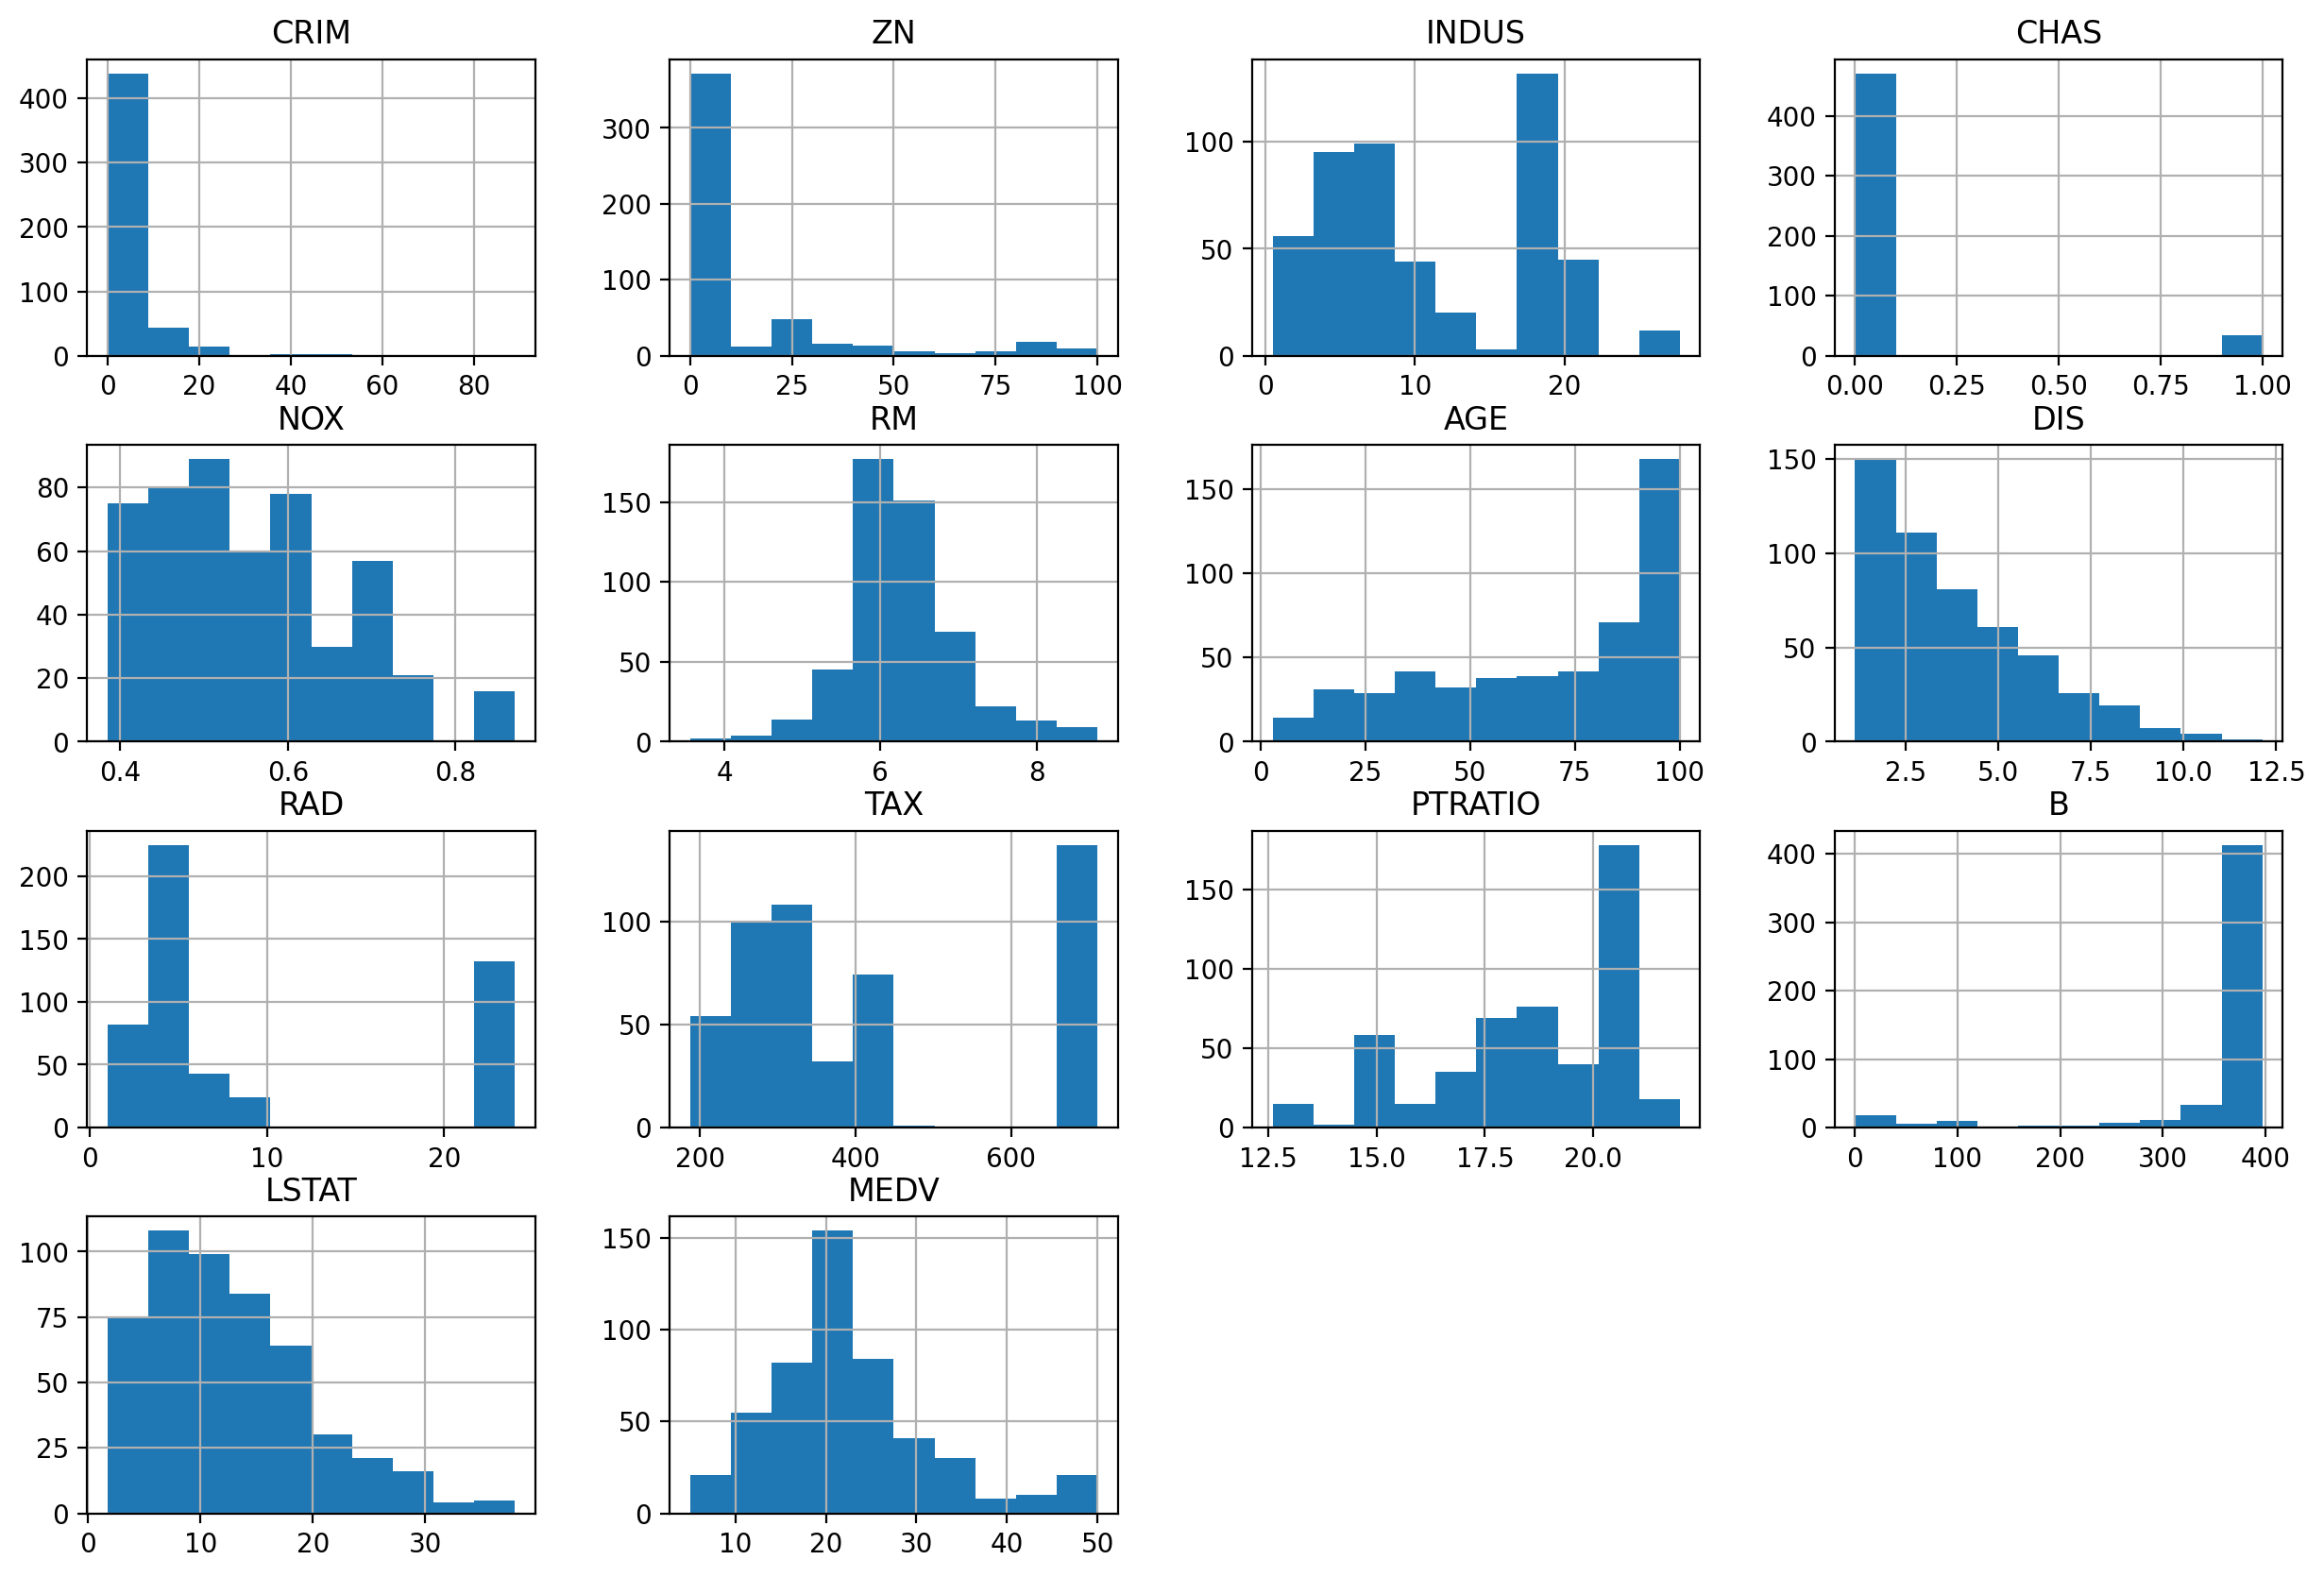

In [5]:
df.hist(figsize=(15, 10));

## sklearn preprocessing

In [7]:
from sklearn import preprocessing

In [10]:
scaler = preprocessing.StandardScaler() # create StandardScaler instance
scaler.fit(df[['RM']]) # คำนวณ mean & standard deviation
z = scaler.transform(df[['RM']]) # คำนวณค่า z-score

In [12]:
z[:5] # 2D numpy array

array([[0.41367189],
       [0.19427445],
       [1.28271368],
       [1.01630251],
       [1.22857665]])

In [14]:
print(f"mean = {z.mean()}")
print(f"std = {z.std()}")

mean = -1.0882818581305882e-16
std = 0.9999999999999999


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# ต้องการเอาค่า z ไปเพิ่มเป็นคอลัมน์ใน dataframe (เอา numpy array ==> create dataframe)
df['z_RM'] = z[:, 0] # all row, column0
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,z_RM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0.413672
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.194274
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.282714
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.016303
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.228577


In [20]:
# ต้องการทำเเบบหลาย column
scaler = preprocessing.StandardScaler()
cols = df[['RM', 'MEDV']]
scaler.fit(cols) 
z = scaler.transform(cols) 
z[:5] # 2D-array 2 columns

array([[ 0.41367189,  0.15968566],
       [ 0.19427445, -0.10152429],
       [ 1.28271368,  1.32424667],
       [ 1.01630251,  1.18275795],
       [ 1.22857665,  1.48750288]])

In [21]:
z.mean(axis=0)

array([-1.08828186e-16, -5.19566823e-16])

In [22]:
z.std(axis=0)

array([1., 1.])

In [ ]:
ds = pd.concat([df, pd.DataFram(z, columns=['z_room'])])